In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt

import pandas as pd

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Smart Meter 65

In [2]:
p1 = read_csv('ics_data/07_Smart_Meter_65/P1.csv', squeeze=True, index_col=0)
p2 = read_csv('ics_data/07_Smart_Meter_65/P2.csv', squeeze=True, index_col=0)
p3 = read_csv('ics_data/07_Smart_Meter_65/P3.csv', squeeze=True, index_col=0)
q1 = read_csv('ics_data/07_Smart_Meter_65/Q1.csv', squeeze=True, index_col=0)
q2 = read_csv('ics_data/07_Smart_Meter_65/Q2.csv', squeeze=True, index_col=0)
q3 = read_csv('ics_data/07_Smart_Meter_65/Q3.csv', squeeze=True, index_col=0)
u1 = read_csv('ics_data/07_Smart_Meter_65/U1.csv', squeeze=True, index_col=0)
u2 = read_csv('ics_data/07_Smart_Meter_65/U2.csv', squeeze=True, index_col=0)
u3 = read_csv('ics_data/07_Smart_Meter_65/U3.csv', squeeze=True, index_col=0)

/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
def mul_values(dataframe, num):
    new_dataframe = dataframe.copy()
    for (data_index, index) in enumerate(dataframe.index):
        if index > num:
            break
        else:
            new_dataframe.values[data_index] *= 18
    
    return new_dataframe

In [4]:
corner_value = 1567102707326

In [5]:
p1 = mul_values(p1, corner_value)
p2 = mul_values(p2, corner_value)
p3 = mul_values(p3, corner_value)
q1 = mul_values(q1, corner_value)
q2 = mul_values(q2, corner_value)
q3 = mul_values(q3, corner_value)

In [6]:
def convert_timestamps(df):
    df.index = pd.to_datetime(df.index, unit='ms')
    return df

In [7]:
p1 = convert_timestamps(p1)
p2 = convert_timestamps(p2)
p3 = convert_timestamps(p3)
q1 = convert_timestamps(q1)
q2 = convert_timestamps(q2)
q3 = convert_timestamps(q3)
u1 = convert_timestamps(u1)
u2 = convert_timestamps(u2)
u3 = convert_timestamps(u3)

In [8]:
def fix_timestamps(dataframes):
    # check input
    if len(dataframes) <= 0:
        return
    new_dataframes = []
    
    # get a full list of indices
    indices = dataframes[0].index
    for dataframe in dataframes:
        indices = indices.union(dataframe.index)
    print("Got all indices")
        
    for (data_index, dataframe) in enumerate(dataframes):
        dataframe = dataframe.reindex(indices, copy=True).fillna(method = 'ffill') 
        new_dataframes.append(dataframe)
        print("dataframe", data_index + 1, "is fixed")
        
    return new_dataframes

In [9]:
data_list = fix_timestamps([p1, p2, p3, q1, q2, q3, u1, u2, u3])
p1 = data_list[0]
p2 = data_list[1]
p3 = data_list[2]
q1 = data_list[3]
q2 = data_list[4]
q3 = data_list[5]
u1 = data_list[6]
u2 = data_list[7]
u3 = data_list[8]

Got all indices
dataframe 1 is fixed
dataframe 2 is fixed
dataframe 3 is fixed
dataframe 4 is fixed
dataframe 5 is fixed
dataframe 6 is fixed
dataframe 7 is fixed
dataframe 8 is fixed
dataframe 9 is fixed


## Save fixed data so we don't need to fix it again

In [ ]:
p1.to_csv("ics_data_fixed/Smart_Meter_65/P1.csv", header=True, index=True, encoding='utf-8')
p2.to_csv("ics_data_fixed/Smart_Meter_65/P2.csv", header=True, index=True, encoding='utf-8')
p3.to_csv("ics_data_fixed/Smart_Meter_65/P3.csv", header=True, index=True, encoding='utf-8')
q1.to_csv("ics_data_fixed/Smart_Meter_65/Q1.csv", header=True, index=True, encoding='utf-8')
q2.to_csv("ics_data_fixed/Smart_Meter_65/Q2.csv", header=True, index=True, encoding='utf-8')
q3.to_csv("ics_data_fixed/Smart_Meter_65/Q3.csv", header=True, index=True, encoding='utf-8')
u1.to_csv("ics_data_fixed/Smart_Meter_65/U1.csv", header=True, index=True, encoding='utf-8')
u2.to_csv("ics_data_fixed/Smart_Meter_65/U2.csv", header=True, index=True, encoding='utf-8')
u3.to_csv("ics_data_fixed/Smart_Meter_65/U3.csv", header=True, index=True, encoding='utf-8')

## Analyze data

In [ ]:
p1 = read_csv('ics_data_fixed/Smart_Meter_65/P1.csv', squeeze=True, index_col=0)
p2 = read_csv('ics_data_fixed/Smart_Meter_65/P2.csv', squeeze=True, index_col=0)
p3 = read_csv('ics_data_fixed/Smart_Meter_65/P3.csv', squeeze=True, index_col=0)
q1 = read_csv('ics_data_fixed/Smart_Meter_65/Q1.csv', squeeze=True, index_col=0)
q2 = read_csv('ics_data_fixed/Smart_Meter_65/Q2.csv', squeeze=True, index_col=0)
q3 = read_csv('ics_data_fixed/Smart_Meter_65/Q3.csv', squeeze=True, index_col=0)
u1 = read_csv('ics_data_fixed/Smart_Meter_65/U1.csv', squeeze=True, index_col=0)
u2 = read_csv('ics_data_fixed/Smart_Meter_65/U2.csv', squeeze=True, index_col=0)
u3 = read_csv('ics_data_fixed/Smart_Meter_65/U3.csv', squeeze=True, index_col=0)

In [10]:
def print_stats(name, data):
    stat_data = data.describe()
    print('%s: mean = %f, std = %f, V = %f' % (name, stat_data['mean'], stat_data['std'], stat_data['std']/stat_data['mean']))

In [11]:
print_stats('P1', p1)
print_stats('P2', p2)
print_stats('P3', p3)
print_stats('Q1', q1)
print_stats('Q2', q2)
print_stats('Q3', q3)
print_stats('U1', u1)
print_stats('U2', u2)
print_stats('U3', u3)

P1: mean = 449.393135, std = 378.945490, V = 0.843238
P2: mean = 861.871355, std = 743.522283, V = 0.862684
P3: mean = 1896.398291, std = 1133.349203, V = 0.597632
Q1: mean = 12.515114, std = 340.761829, V = 27.228025
Q2: mean = 752.486336, std = 760.840452, V = 1.011102
Q3: mean = 641.941005, std = 322.660528, V = 0.502633
U1: mean = 226.839567, std = 3.147646, V = 0.013876
U2: mean = 227.620130, std = 3.160971, V = 0.013887
U3: mean = 226.028079, std = 3.110071, V = 0.013760


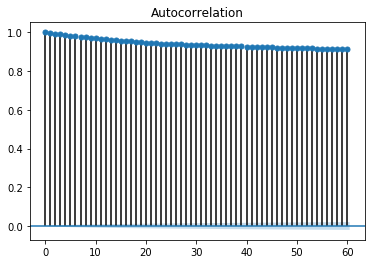

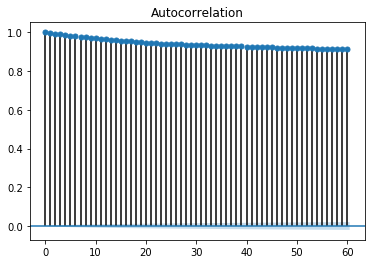

In [12]:
plot_acf(p1[:1_000_000])

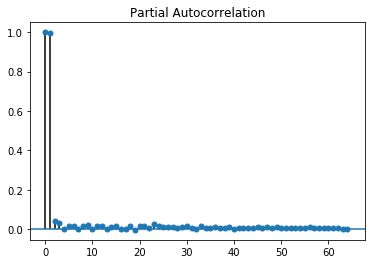

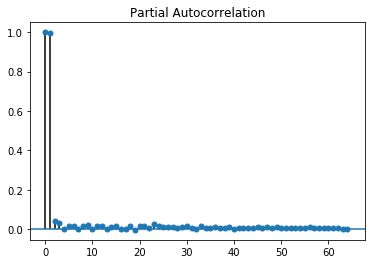

In [13]:
plot_pacf(p1)

In [14]:
# Correlation between P values
print('p1 and p2:', p1.corr(p2))
print('p2 and p3:', p2.corr(p3))
print('p1 and p3:', p1.corr(p3))

p1 and p2: 0.4715611343349515
p2 and p3: 0.3305115499950774
p1 and p3: 0.5894235582385281


In [15]:
# Correlation between Q values
print('q1 and q2:', q1.corr(q2))
print('q2 and q3:', q2.corr(q3))
print('q1 and q3:', q1.corr(q3))

q1 and q2: 0.23013348138938727
q2 and q3: 0.463159169058855
q1 and q3: 0.4788960081158499


In [16]:
# Correlation between U values
print('u1 and u2:', u1.corr(u2))
print('u2 and u3:', u2.corr(u3))
print('u1 and u3:', u1.corr(u3))

u1 and u2: 0.9979647525578083
u2 and u3: 0.9979758930959169
u1 and u3: 0.9982677089612777


In [17]:
# Correlation between P, Q and R - 1st phase
print('p1 and q1:', p1.corr(q1))
print('p1 and u1:', p1.corr(u1))
print('q1 and u1:', q1.corr(u1))

p1 and q1: 0.5431032222190068
p1 and u1: -0.37025034128873374
q1 and u1: -0.3563870537335224


In [18]:
# Correlation between P, Q and R - 2nd phase
print('p2 and q2:', p2.corr(q2))
print('p2 and u2:', p2.corr(u2))
print('q2 and u2:', q2.corr(u2))

p2 and q2: 0.9191826147820139
p2 and u2: 0.013982762162655636
q2 and u2: -0.15847194425640163


In [19]:
# Correlation between P, Q and R - 3rd phase
print('p3 and q3:', p3.corr(q3))
print('p3 and u3:', p3.corr(u3))
print('q3 and u3:', q3.corr(u3))

p3 and q3: 0.7398980659390073
p3 and u3: -0.37917958757610787
q3 and u3: -0.32231774451062306


Корелляция между P и Q ожидаемо высока, а корреляция этих параметров с U достаточно низкая

### By months

In [20]:
# We have 7 month of data
p1

ts
2019-05-15 15:15:21.121    442.80
2019-05-15 15:15:22.506    442.98
2019-05-15 15:15:24.506    442.98
2019-05-15 15:15:26.511    442.44
2019-05-15 15:15:28.526    442.44
                            ...  
2019-11-14 20:59:39.909    507.00
2019-11-14 20:59:44.909    508.00
2019-11-14 20:59:49.914    508.00
2019-11-14 20:59:54.919    508.00
2019-11-14 20:59:59.924    508.20
Name: P1, Length: 2410711, dtype: float64

In [10]:
month_numbers = ['05', '06', '07', '08', '09', '10', '11']

In [11]:
months_p1 = [p1.loc['2019-' + i] for i in month_numbers]
months_p2 = [p2.loc['2019-' + i] for i in month_numbers]
months_p3 = [p3.loc['2019-' + i] for i in month_numbers]
months_q1 = [q1.loc['2019-' + i] for i in month_numbers]
months_q2 = [q2.loc['2019-' + i] for i in month_numbers]
months_q3 = [q3.loc['2019-' + i] for i in month_numbers]
months_u1 = [u1.loc['2019-' + i] for i in month_numbers]
months_u2 = [u2.loc['2019-' + i] for i in month_numbers]
months_u3 = [u3.loc['2019-' + i] for i in month_numbers]

#### Mean

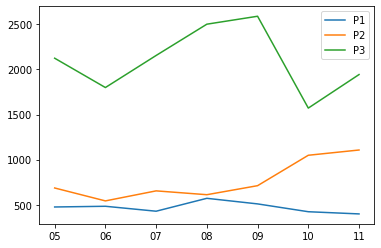

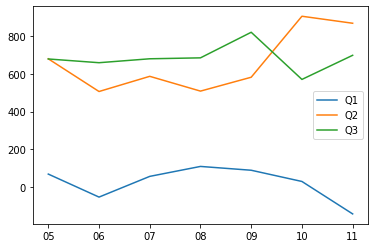

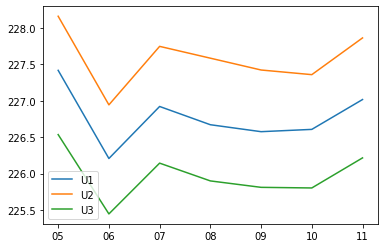

In [23]:
plt.figure()
plt.plot(month_numbers, [month.mean() for month in months_p1], label='P1')
plt.plot(month_numbers, [month.mean() for month in months_p2], label='P2') 
plt.plot(month_numbers, [month.mean() for month in months_p3], label='P3') 
plt.legend()
plt.figure()
plt.plot(month_numbers, [month.mean() for month in months_q1], label='Q1')
plt.plot(month_numbers, [month.mean() for month in months_q2], label='Q2') 
plt.plot(month_numbers, [month.mean() for month in months_q3], label='Q3') 
plt.legend()
plt.figure()
plt.plot(month_numbers, [month.mean() for month in months_u1], label='U1')
plt.plot(month_numbers, [month.mean() for month in months_u2], label='U2') 
plt.plot(month_numbers, [month.mean() for month in months_u3], label='U3') 
plt.legend()

#### Variance

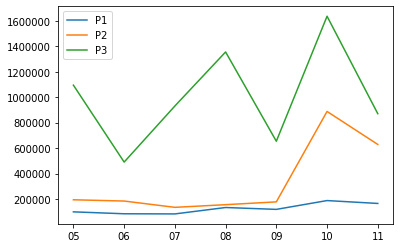

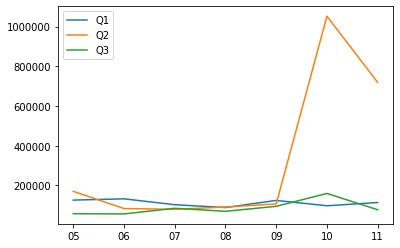

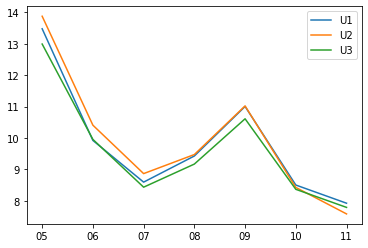

In [24]:
plt.figure()
plt.plot(month_numbers, [month.var() for month in months_p1], label='P1')
plt.plot(month_numbers, [month.var() for month in months_p2], label='P2') 
plt.plot(month_numbers, [month.var() for month in months_p3], label='P3') 
plt.legend()
plt.figure()
plt.plot(month_numbers, [month.var() for month in months_q1], label='Q1')
plt.plot(month_numbers, [month.var() for month in months_q2], label='Q2') 
plt.plot(month_numbers, [month.var() for month in months_q3], label='Q3')
plt.legend()
plt.figure()
plt.plot(month_numbers, [month.var() for month in months_u1], label='U1')
plt.plot(month_numbers, [month.var() for month in months_u2], label='U2') 
plt.plot(month_numbers, [month.var() for month in months_u3], label='U3')
plt.legend()

Немного предварительных выводов:
1. Четкой сезонности и четкого тренда по месяцам не видно (возможно, из-за того, что данные были взяты в срок меньше года), но существиет разница в параметрах между месяцами
2. Существует довольно большая разница в значениях между фазами, причем для P и Q эта разница местами довольно велика и не одинакова. Вероятно, это связано с особенностями работы счетчика.
3. Очень похожие графики для трех фаз напряжения (и среднее, и std). Вероятно, отличия между ними обусловлены особенностью работы счетчика

In [21]:
for month in months_p1:
    result = adfuller(month)
    print ('adf: ', result[0] )
    print ('p-value: ', result[1])
    print('Critical values: ', result[4])
    if result[0]> result[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен \n')
    else:
        print ('единичных корней нет, ряд стационарен \n')

adf:  -13.092773579747346
p-value:  1.774413805104645e-24
Critical values:  {'1%': -3.430362117120248, '5%': -2.861545355625394, '10%': -2.566772850603611}
единичных корней нет, ряд стационарен 

adf:  -10.50654678973453
p-value:  1.0506725013323757e-18
Critical values:  {'1%': -3.4303767841161976, '5%': -2.861551838236757, '10%': -2.566776301065755}
единичных корней нет, ряд стационарен 

adf:  -9.926148020961067
p-value:  2.9034753161954277e-17
Critical values:  {'1%': -3.430388016217018, '5%': -2.861556802649843, '10%': -2.566778943449039}
единичных корней нет, ряд стационарен 

adf:  -10.41146487025838
p-value:  1.7995262612494795e-18
Critical values:  {'1%': -3.4303867474604797, '5%': -2.861556241880216, '10%': -2.5667786449708347}
единичных корней нет, ряд стационарен 

adf:  -5.27427409386316
p-value:  6.189095843354537e-06
Critical values:  {'1%': -3.4306406170489105, '5%': -2.861668443308896, '10%': -2.566838366726904}
единичных корней нет, ряд стационарен 

adf:  -14.20109691

In [12]:
for month in months_p2:
    result = adfuller(month)
    print ('adf: ', result[0] )
    print ('p-value: ', result[1])
    print('Critical values: ', result[4])
    if result[0]> result[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен \n')
    else:
        print ('единичных корней нет, ряд стационарен \n')

adf:  -7.463256996226443
p-value:  5.285377931665108e-11
Critical values:  {'1%': -3.430362117120248, '5%': -2.861545355625394, '10%': -2.566772850603611}
единичных корней нет, ряд стационарен 

adf:  -8.028956891946505
p-value:  1.9820678317542147e-12
Critical values:  {'1%': -3.43037678334829, '5%': -2.8615518378973532, '10%': -2.5667763008851026}
единичных корней нет, ряд стационарен 

adf:  -10.267224299193433
p-value:  4.0891126055760716e-18
Critical values:  {'1%': -3.430388014891021, '5%': -2.861556802063774, '10%': -2.566778943137095}
единичных корней нет, ряд стационарен 

adf:  -9.96257785627125
p-value:  2.3522659929107286e-17
Critical values:  {'1%': -3.430386743950288, '5%': -2.861556240328768, '10%': -2.566778644145053}
единичных корней нет, ряд стационарен 

adf:  -2.06690982835307
p-value:  0.25802674062721476
Critical values:  {'1%': -3.4306406041339934, '5%': -2.861668437601201, '10%': -2.5668383636888117}
есть единичные корни, ряд не стационарен 

adf:  -5.1627486057

In [13]:
for month in months_p3:
    result = adfuller(month)
    print ('adf: ', result[0] )
    print ('p-value: ', result[1])
    print('Critical values: ', result[4])
    if result[0]> result[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен \n')
    else:
        print ('единичных корней нет, ряд стационарен \n')

adf:  -17.9060538803503
p-value:  2.9413091788467893e-30
Critical values:  {'1%': -3.430362117120248, '5%': -2.861545355625394, '10%': -2.566772850603611}
единичных корней нет, ряд стационарен 

adf:  -10.018512046780762
p-value:  1.7034306996223997e-17
Critical values:  {'1%': -3.4303767842259023, '5%': -2.8615518382852447, '10%': -2.5667763010915636}
единичных корней нет, ряд стационарен 

adf:  -6.9889997505045764
p-value:  7.833071819040695e-10
Critical values:  {'1%': -3.430388016217018, '5%': -2.861556802649843, '10%': -2.566778943449039}
единичных корней нет, ряд стационарен 

adf:  -6.849611359036506
p-value:  1.7075662159187879e-09
Critical values:  {'1%': -3.4303867482865047, '5%': -2.8615562422453054, '10%': -2.5667786451651593}
единичных корней нет, ряд стационарен 

adf:  -5.5886799840981185
p-value:  1.3445798410271417e-06
Critical values:  {'1%': -3.4306407333348408, '5%': -2.8616684947009885, '10%': -2.5668383940818935}
единичных корней нет, ряд стационарен 

adf:  -9.3

In [14]:
for month in months_q1:
    result = adfuller(month)
    print ('adf: ', result[0] )
    print ('p-value: ', result[1])
    print('Critical values: ', result[4])
    if result[0]> result[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен \n')
    else:
        print ('единичных корней нет, ряд стационарен \n')

adf:  -5.446027342165952
p-value:  2.709371679765624e-06
Critical values:  {'1%': -3.4303621170753424, '5%': -2.8615453556055463, '10%': -2.566772850593047}
единичных корней нет, ряд стационарен 

adf:  -6.143669437654749
p-value:  7.860638913069474e-08
Critical values:  {'1%': -3.4303767842259023, '5%': -2.8615518382852447, '10%': -2.5667763010915636}
единичных корней нет, ряд стационарен 

adf:  -5.88263722094405
p-value:  3.052874794445912e-07
Critical values:  {'1%': -3.430388016217018, '5%': -2.861556802649843, '10%': -2.566778943449039}
единичных корней нет, ряд стационарен 

adf:  -6.036923738609822
p-value:  1.374994977498543e-07
Critical values:  {'1%': -3.430386748079995, '5%': -2.8615562421540317, '10%': -2.5667786451165773}
единичных корней нет, ряд стационарен 

adf:  -2.467119870203024
p-value:  0.12368072240544042
Critical values:  {'1%': -3.4306406299649757, '5%': -2.8616684490170985, '10%': -2.566838369765267}
есть единичные корни, ряд не стационарен 

adf:  -10.567715

In [15]:
for month in months_q2:
    result = adfuller(month)
    print ('adf: ', result[0] )
    print ('p-value: ', result[1])
    print('Critical values: ', result[4])
    if result[0]> result[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен \n')
    else:
        print ('единичных корней нет, ряд стационарен \n')

adf:  -5.546172789410042
p-value:  1.6589628244905426e-06
Critical values:  {'1%': -3.430362117120248, '5%': -2.861545355625394, '10%': -2.566772850603611}
единичных корней нет, ряд стационарен 

adf:  -7.635195026640252
p-value:  1.9608550482435195e-11
Critical values:  {'1%': -3.4303767822513556, '5%': -2.861551837412524, '10%': -2.566776300627045}
единичных корней нет, ряд стационарен 

adf:  -9.49065071809341
p-value:  3.660499150884179e-16
Critical values:  {'1%': -3.4303880153330097, '5%': -2.8615568022591256, '10%': -2.5667789432410735}
единичных корней нет, ряд стационарен 

adf:  -10.435215315195808
p-value:  1.5728438126100296e-18
Critical values:  {'1%': -3.4303867425051098, '5%': -2.861556239690023, '10%': -2.5667786438050713}
единичных корней нет, ряд стационарен 

adf:  -1.4209053915429035
p-value:  0.572213796739232
Critical values:  {'1%': -3.4306405912202242, '5%': -2.8616684318940133, '10%': -2.5668383606509892}
есть единичные корни, ряд не стационарен 

adf:  -4.6295

In [16]:
for month in months_q3:
    result = adfuller(month)
    print ('adf: ', result[0] )
    print ('p-value: ', result[1])
    print('Critical values: ', result[4])
    if result[0]> result[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен \n')
    else:
        print ('единичных корней нет, ряд стационарен \n')

adf:  -11.21013098893112
p-value:  2.1357512857874226e-20
Critical values:  {'1%': -3.430362117120248, '5%': -2.861545355625394, '10%': -2.566772850603611}
единичных корней нет, ряд стационарен 

adf:  -10.599735928809139
p-value:  6.21563160247546e-19
Critical values:  {'1%': -3.4303767842259023, '5%': -2.8615518382852447, '10%': -2.5667763010915636}
единичных корней нет, ряд стационарен 

adf:  -10.538339629115612
p-value:  8.781481616960197e-19
Critical values:  {'1%': -3.4303880157750086, '5%': -2.861556802454482, '10%': -2.566778943345055}
единичных корней нет, ряд стационарен 

adf:  -9.483318440990928
p-value:  3.8209692889406424e-16
Critical values:  {'1%': -3.4303867482865047, '5%': -2.8615562422453054, '10%': -2.5667786451651593}
единичных корней нет, ряд стационарен 

adf:  -4.173382601745924
p-value:  0.0007306953656986783
Critical values:  {'1%': -3.430640462145629, '5%': -2.86166837485002, '10%': -2.566838330287606}
единичных корней нет, ряд стационарен 

adf:  -6.3642515

In [17]:
for month in months_u1:
    result = adfuller(month)
    print ('adf: ', result[0] )
    print ('p-value: ', result[1])
    print('Critical values: ', result[4])
    if result[0]> result[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен \n')
    else:
        print ('единичных корней нет, ряд стационарен \n')

adf:  -4.444110148929558
p-value:  0.00024778975494899166
Critical values:  {'1%': -3.430362117097795, '5%': -2.86154535561547, '10%': -2.566772850598329}
единичных корней нет, ряд стационарен 

adf:  -6.11018153108683
p-value:  9.37374149480177e-08
Critical values:  {'1%': -3.4303767783031356, '5%': -2.8615518356674694, '10%': -2.566776299698214}
единичных корней нет, ряд стационарен 

adf:  -7.574486646906348
p-value:  2.7849171394462342e-11
Critical values:  {'1%': -3.430388004065504, '5%': -2.8615567972790736, '10%': -2.566778940590365}
единичных корней нет, ряд стационарен 

adf:  -6.762945636881774
p-value:  2.7625569890286733e-09
Critical values:  {'1%': -3.4303867482865047, '5%': -2.8615562422453054, '10%': -2.5667786451651593}
единичных корней нет, ряд стационарен 

adf:  -2.6740761097219097
p-value:  0.07863266296697327
Critical values:  {'1%': -3.430640487951374, '5%': -2.861668386254764, '10%': -2.566838336358124}
есть единичные корни, ряд не стационарен 

adf:  -4.95933815

In [18]:
for month in months_u2:
    result = adfuller(month)
    print ('adf: ', result[0] )
    print ('p-value: ', result[1])
    print('Critical values: ', result[4])
    if result[0]> result[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен \n')
    else:
        print ('единичных корней нет, ряд стационарен \n')

adf:  -4.380507170658677
p-value:  0.0003213197204654106
Critical values:  {'1%': -3.4303621166038587, '5%': -2.8615453553971566, '10%': -2.5667728504821286}
единичных корней нет, ряд стационарен 

adf:  -5.976858058375746
p-value:  1.878543306175638e-07
Critical values:  {'1%': -3.4303767785224504, '5%': -2.8615518357644034, '10%': -2.5667762997498085}
единичных корней нет, ряд стационарен 

adf:  -7.517456255409793
p-value:  3.869334758735223e-11
Critical values:  {'1%': -3.4303880036237775, '5%': -2.861556797083838, '10%': -2.5667789404864476}
единичных корней нет, ряд стационарен 

adf:  -6.73403418348904
p-value:  3.241479470681265e-09
Critical values:  {'1%': -3.4303867478734875, '5%': -2.8615562420627585, '10%': -2.5667786450679957}
единичных корней нет, ряд стационарен 

adf:  -2.6415941821231197
p-value:  0.08470164227848836
Critical values:  {'1%': -3.430640462145629, '5%': -2.86166837485002, '10%': -2.566838330287606}
есть единичные корни, ряд не стационарен 

adf:  -4.95122

In [19]:
for month in months_u3:
    result = adfuller(month)
    print ('adf: ', result[0] )
    print ('p-value: ', result[1])
    print('Critical values: ', result[4])
    if result[0]> result[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен \n')
    else:
        print ('единичных корней нет, ряд стационарен \n')

adf:  -4.525977182360986
p-value:  0.00017644514321284795
Critical values:  {'1%': -3.4303621166263096, '5%': -2.8615453554070793, '10%': -2.56677285048741}
единичных корней нет, ряд стационарен 

adf:  -6.095925829266122
p-value:  1.0101481450790914e-07
Critical values:  {'1%': -3.4303767766583873, '5%': -2.861551834940515, '10%': -2.566776299311282}
единичных корней нет, ряд стационарен 

adf:  -7.574897805337883
p-value:  2.778314961900781e-11
Critical values:  {'1%': -3.430388004065504, '5%': -2.8615567972790736, '10%': -2.566778940590365}
единичных корней нет, ряд стационарен 

adf:  -6.829964714499953
p-value:  1.904782213555076e-09
Critical values:  {'1%': -3.4303867478734875, '5%': -2.8615562420627585, '10%': -2.5667786450679957}
единичных корней нет, ряд стационарен 

adf:  -2.6681989890230713
p-value:  0.07970473475360657
Critical values:  {'1%': -3.430640462145629, '5%': -2.86166837485002, '10%': -2.566838330287606}
есть единичные корни, ряд не стационарен 

adf:  -4.9572103

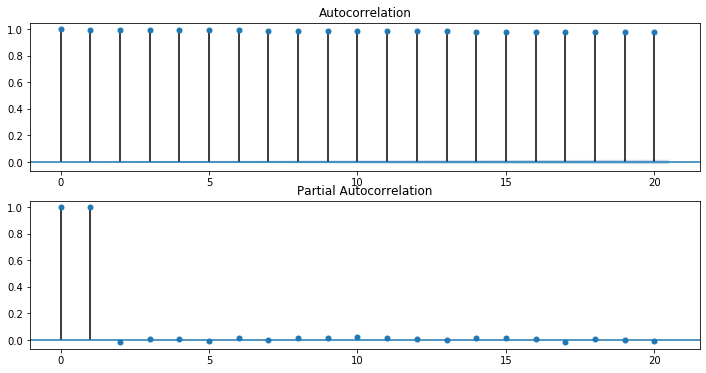

In [20]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(months_p1[0], ax=ax[0], lags=20)
ax[1] = plot_pacf(months_p1[0], ax=ax[1], lags=20)

### By working days/holidays

In [47]:
holidays = [['18', '19', '25', '26'], 
            ['01', '02', '08', '09', '15', '16', '22', '23', '29', '30'], 
            ['06', '07', '13', '14', '20', '21', '27', '28'], 
            ['03', '04', '10', '11', '17', '18', '24', '25', '31'], 
            ['01', '07', '08', '14', '15', '21', '22', '28', '29'], 
            ['05', '06', '12', '13', '19', '20', '26', '27'], 
            ['02', '03', '09', '10']]

In [72]:
all_weekends = [month+'-'+day for (month, days) in zip(month_numbers, holidays) for day in days]

In [107]:
holidays_p1 = pd.concat([p1.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = p1.append(holidays_p1)
working_days_p1 = combined[~combined.index.duplicated(keep=False)]
print("separated P1")

holidays_p2 = pd.concat([p2.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = p2.append(holidays_p2)
working_days_p2 = combined[~combined.index.duplicated(keep=False)]
print("separated P2")

holidays_p3 = pd.concat([p3.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = p3.append(holidays_p3)
working_days_p3 = combined[~combined.index.duplicated(keep=False)]
print("separated P3")

holidays_q1 = pd.concat([q1.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = q1.append(holidays_q1)
working_days_q1 = combined[~combined.index.duplicated(keep=False)]
print("separated Q1")

holidays_q2 = pd.concat([q2.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = q2.append(holidays_q2)
working_days_q2 = combined[~combined.index.duplicated(keep=False)]
print("separated Q2")

holidays_q3 = pd.concat([q3.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = q3.append(holidays_q3)
working_days_q3 = combined[~combined.index.duplicated(keep=False)]
print("separated Q3")

holidays_u1 = pd.concat([u1.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = u1.append(holidays_u1)
working_days_u1 = combined[~combined.index.duplicated(keep=False)]
print("separated U1")

holidays_u2 = pd.concat([u2.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = u2.append(holidays_u2)
working_days_u2 = combined[~combined.index.duplicated(keep=False)]
print("separated U2")

holidays_u3 = pd.concat([u3.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = u3.append(holidays_u3)
working_days_u3 = combined[~combined.index.duplicated(keep=False)]
print("separated U3")

separated P1
separated P2
separated P3
separated Q1
separated Q2
separated Q3
separated U1
separated U2
separated U3


In [111]:
print_stats('P1 - holidays ', holidays_p1)
print_stats('P1 - working days ', working_days_p1)
print_stats('P2 - holidays ', holidays_p2)
print_stats('P2 - working days ', working_days_p2)
print_stats('P3 - holidays ', holidays_p3)
print_stats('P3 - working days ', working_days_p3)

P1 - holidays : mean = 330.462559, std = 340.728015, V = 1.031064
P1 - working days : mean = 506.339096, std = 383.084490, V = 0.756577
P2 - holidays : mean = 711.079904, std = 829.919266, V = 1.167125
P2 - working days : mean = 934.072839, std = 686.756644, V = 0.735228
P3 - holidays : mean = 1450.272537, std = 733.291383, V = 0.505623
P3 - working days : mean = 2110.010810, std = 1225.200299, V = 0.580661


In [112]:
print_stats('Q1 - holidays ', holidays_q1)
print_stats('Q1 - working days ', working_days_q1)
print_stats('Q2 - holidays ', holidays_q2)
print_stats('Q2 - working days ', working_days_q2)
print_stats('Q3 - holidays ', holidays_q3)
print_stats('Q3 - working days ', working_days_q3)

Q1 - holidays : mean = -194.584790, std = 243.669120, V = -1.252252
Q1 - working days : mean = 111.678033, std = 336.033804, V = 3.008952
Q2 - holidays : mean = 607.729571, std = 856.766189, V = 1.409782
Q2 - working days : mean = 821.798311, std = 699.816407, V = 0.851567
Q3 - holidays : mean = 502.240548, std = 233.493354, V = 0.464903
Q3 - working days : mean = 708.831935, std = 337.691594, V = 0.476406


In [113]:
print_stats('U1 - holidays ', holidays_u1)
print_stats('U1 - working days ', working_days_u1)
print_stats('U2 - holidays ', holidays_u2)
print_stats('U2 - working days ', working_days_u2)
print_stats('U3 - holidays ', holidays_u3)
print_stats('U3 - working days ', working_days_u3)

U1 - holidays : mean = 226.997276, std = 2.492769, V = 0.010981
U1 - working days : mean = 226.764053, std = 3.414485, V = 0.015057
U2 - holidays : mean = 227.776446, std = 2.492165, V = 0.010941
U2 - working days : mean = 227.545283, std = 3.432896, V = 0.015087
U3 - holidays : mean = 226.211306, std = 2.444442, V = 0.010806
U3 - working days : mean = 225.940347, std = 3.379212, V = 0.014956


Из полученных результатов можно сделать вывод, что значения мощности (P и Q) на выходных в среднем ниже, чем по рабочим дням
В данных напряжения наблюдается противоположный результат, однако различия между значениями малы.
#### Из сказанного выше можно сделать вывод, что в данных есть сезонная составляющая